In [1]:
import pandas as pd
%matplotlib inline

In [2]:
# Path_1 is for Macbook Pro
# Path_2 is for Mac Pro
PATH_1 = "/Users/ka-mantse/Google Drive/_My Data Analytics Exercise/Exercise/UCI Data Set/Abscisic Acid Signaling Network"
PATH_2 = "/Users/simontse/Google Drive/_My Data Analytics Exercise/Exercise/UCI Data Set/Abscisic Acid Signaling Network"

In [3]:
with open("plantCellSignaling.names") as f:
    lines = f.readlines()
    for line in lines:
        print (line)

1. Title: Abscisic Acid Signaling Network





2. Source:



Jerry W. Jenkins, Ph.D.

Systems Biology and Bioinformations Group

CFD Research Corporation

215 Wynn Drive

Huntsville, AL 35805

email: jwj '@' cfdrc.com



Abhishek Soni, Ph.D.

Systems Biology and Bioinformations Group

CFD Research Corporation

215 Wynn Drive

Huntsville, AL 35805

email: axs '@' cfdrc.com 





3. Past Usage:



Li S, Assman SM, Albert R (2006) Predicting essential components of signal 

transduction networks: a dynamic model of guard cell abscisic acid 

signaling. Plos Biology 4: p. 1732-1748



Soni, A.S., Jenkins, J.W., and Sundaram, S.S.: .Determination of critical 

network interactions: An augmented Boolean pseudo-dynamics approach., IET 

Systems Biology, vol. 2, p. 55-63 (2008). 





4. Relevant Information:



The objective is to determine the set of boolean rules that describe the 

interactions of the nodes within this plant signaling network. The dataset 

includes 300 separate boolean ps

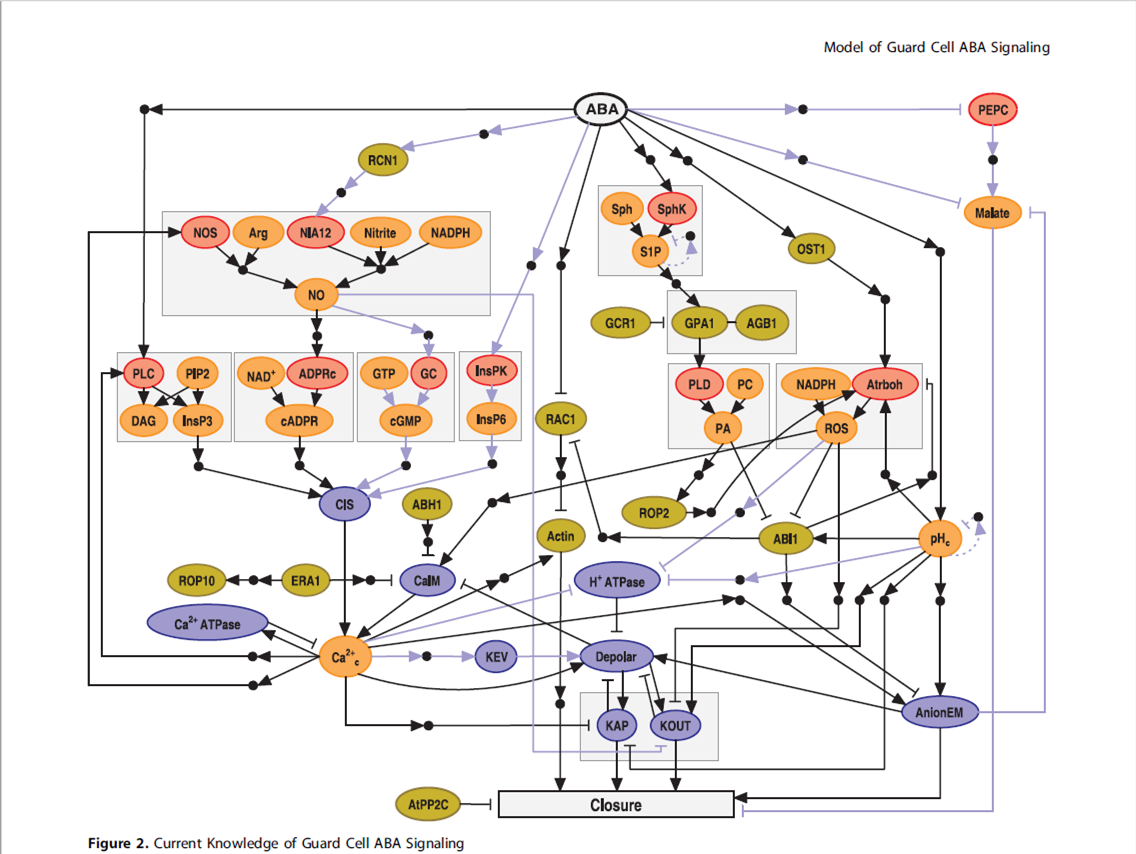

In [4]:
# The curated Abscisic Acid Signaling Network
from IPython.display import Image
Image(filename='Cell ABA Signaling Network.png') 

In [5]:
# Now let's look at the data
with open("plantCellSignaling.data") as f:
    lines = f.readlines()
    for line in lines:
        print (line)

ABA	CLOSURE	Ca	CaATPase	CAIM	CIS	ABH1	GCR	ERA1	PEPC	OST	SPHK	PH	PLD	ROP2	KEV	AGB	RAC	RCN	NIA12	PLC	InsPK	IP6	ADPRc	GC	NOS	S1P	PA	IP3	cADPR	cGMP	MALATE	ATRBOH	GPA	ROS	AnionEM	ABI	DEPOLAR	HATPase	KOUT	KAP	Actin	NO	

***************************

1011101110101101101101001010001011000011001

1100001110111101101101111111011001011101011

1100011110111110101101100011010001110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110


1011011110111111101111100011011011110101010

1101011110111111101101100111100011110101010

1110001110111110101111100011000011110101010

1100011110111111101111100111100011110101010

1110011110111110101111110011100011110101011

1101011110111111101111100111110011110101010

1110011110111110101101111011000011110101011

1111011110111111101111100111110011110101010

1100011110111110101101111011100011110101011

1111011110111110101101101011011011110101010

1100001110111110101101100011001011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

***************************

1011011111111011110111100110010110011101101

1101001110111101101111111010110001011101010

1110011110111110101101100111000011000101010

1011001110111111101111110111000011110101011

1101011110111111101111111111111011110101011

1110011110111111101111111

1110001110111100101101111011010001010101011

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

1100001110111110101101100011000011110101010

***************************

1011111111101100111011110000110100111111010

1101011110111000101101100010000000010101010

11000011101110001011011000

In [6]:
# Let's test the nature of each line of f
import re
print (lines[0])
valid = re.match('[a-zA-Z0-9]+$',lines[0]) is not None
print (valid)
print (lines[1])
valid = re.match('[a-zA-Z0-9]+$',lines[1]) is not None
print (valid)
print (lines[1])
valid = "*" in lines[1]
print(valid)
print (lines[2])
valid = re.match('[a-zA-Z0-9]+$',lines[2]) is not None
print (valid)

ABA	CLOSURE	Ca	CaATPase	CAIM	CIS	ABH1	GCR	ERA1	PEPC	OST	SPHK	PH	PLD	ROP2	KEV	AGB	RAC	RCN	NIA12	PLC	InsPK	IP6	ADPRc	GC	NOS	S1P	PA	IP3	cADPR	cGMP	MALATE	ATRBOH	GPA	ROS	AnionEM	ABI	DEPOLAR	HATPase	KOUT	KAP	Actin	NO	

False
***************************

False
***************************

True
1011101110101101101101001010001011000011001

True


In [7]:
# Process to extract data and store by simulation numbers
def extract_header(line):
    "Extract column header for dataframe creation"
    tokens = line.split("\t")
    #print (tokens)
    header = list()
    for key in tokens[:-1]:
        header.append(key)
    return header

def extract_data(line):
    "Extract data points by simulation"
    data_points = list()
    for i in range(len(line)-1):
        data_points.append(int(line[i]))
    return data_points

with open("plantCellSignaling.data") as f:
    lines = f.readlines()
    sim_data = dict()
    count = 0
    for line in lines:
        if '*' in line:
            count +=1
            key = "sim_"+str(count).zfill(3)
            sim_data[key] = list()
            #print (key)
        elif re.match('[a-zA-Z0-9]+$',line) is None:
            header = extract_header(line)
        else:
            sim_data[key].append(extract_data(line))

In [8]:
# Number of simulations in data file.
print (len(sim_data))

260


In [9]:
# Let's call a simulation out for inspecttion
print (len(sim_data['sim_001']))
for value in sim_data['sim_001']:
    print (value)

21
[1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1]
[1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1]
[1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0]
[1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0]
[1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0]
[1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0]
[1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0]
[1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,

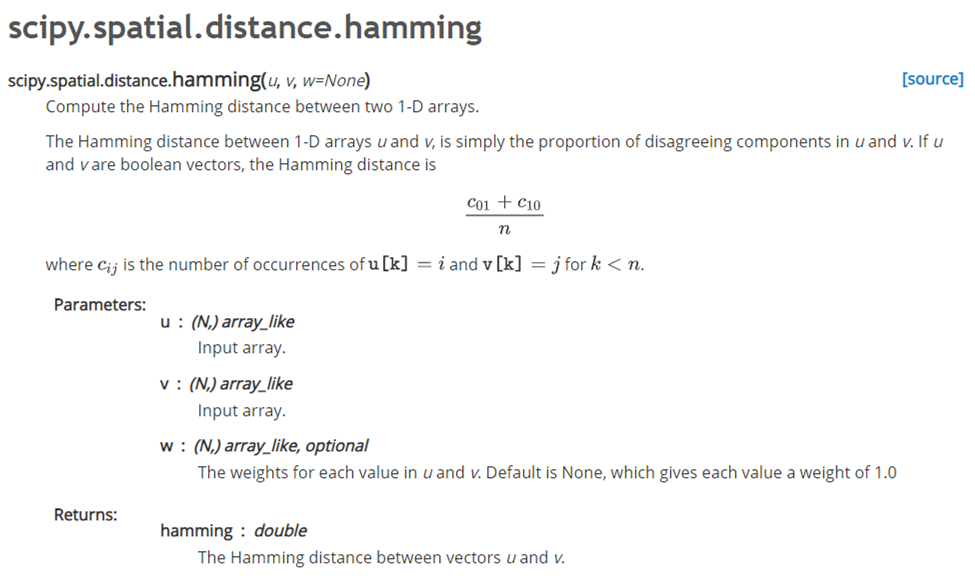

In [10]:
# Since the value is in binary, it's reasonable to 
# measure similary by Hamming Distance which is devised to measure
# how many "steps" are needed to change from one sequence to another.
# Smaller the number, closer the two sequences are.
%matplotlib inline
from IPython.display import Image
Image("hamming_distance.png")

In [11]:
# Helper function to calculate Hamming Distance
from scipy.spatial.distance import hamming
def calculate_hamming(u,v):
    "calculate the Hamming Distance of two vectors of equal dimension"
    assert len(u)==len(v), "Dimension of two vectors do not match"
    return round(hamming(u,v),4)

In [12]:
# Test case to illustrate
u_max = [0,0,0]
v_max = [1,1,1]
print(calculate_hamming(u_max,v_max))
u_min = [1,1,1]
v_min = [1,1,1]
print(calculate_hamming(u_min,v_min))

1.0
0.0


In [13]:
# Let's create a dataframe to examine individual simulation
df = pd.DataFrame(sim_data['sim_001'],columns=header)

In [14]:
# Let's examine the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ABA       21 non-null     int64
 1   CLOSURE   21 non-null     int64
 2   Ca        21 non-null     int64
 3   CaATPase  21 non-null     int64
 4   CAIM      21 non-null     int64
 5   CIS       21 non-null     int64
 6   ABH1      21 non-null     int64
 7   GCR       21 non-null     int64
 8   ERA1      21 non-null     int64
 9   PEPC      21 non-null     int64
 10  OST       21 non-null     int64
 11  SPHK      21 non-null     int64
 12  PH        21 non-null     int64
 13  PLD       21 non-null     int64
 14  ROP2      21 non-null     int64
 15  KEV       21 non-null     int64
 16  AGB       21 non-null     int64
 17  RAC       21 non-null     int64
 18  RCN       21 non-null     int64
 19  NIA12     21 non-null     int64
 20  PLC       21 non-null     int64
 21  InsPK     21 non-null     int64
 22  IP6 

In [15]:
df.describe()

,ABA,CLOSURE,Ca,CaATPase,CAIM,CIS,ABH1,GCR,ERA1,PEPC,...,GPA,ROS,AnionEM,ABI,DEPOLAR,HATPase,KOUT,KAP,Actin,NO
count,21.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.0,21.0,21.0,21.0,...,21.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.0,21.0,21.000000,21.000000
mean,1.0,0.952381,0.047619,0.047619,0.047619,0.047619,1.0,1.0,1.0,0.0,...,1.0,0.904762,0.952381,0.047619,0.952381,0.047619,1.0,0.0,0.952381,0.095238
std,0.0,0.218218,0.218218,0.218218,0.218218,0.218218,0.0,0.0,0.0,0.0,...,0.0,0.300793,0.218218,0.218218,0.218218,0.218218,0.0,0.0,0.218218,0.300793
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.0,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000
25%,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.0,...,1.0,1.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.0,1.000000,0.000000
50%,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.0,...,1.0,1.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.0,1.000000,0.000000
75%,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.0,...,1.0,1.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.0,1.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,0.0,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,1.000000,1.000000


In [16]:
from IPython.display import display, HTML
display(HTML(df.to_html()))

,ABA,CLOSURE,Ca,CaATPase,CAIM,CIS,ABH1,GCR,ERA1,PEPC,OST,SPHK,PH,PLD,ROP2,KEV,AGB,RAC,RCN,NIA12,PLC,InsPK,IP6,ADPRc,GC,NOS,S1P,PA,IP3,cADPR,cGMP,MALATE,ATRBOH,GPA,ROS,AnionEM,ABI,DEPOLAR,HATPase,KOUT,KAP,Actin,NO
0,1,0,1,1,1,0,1,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,1
1,1,1,0,0,0,0,1,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,1,0,1,1,1,0,1,0,1,1
2,1,1,0,0,0,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,0,1,1,0,0,0,1,1,0,1,0,0,0,1,1,1,0,1,0,1,0,1,0
3,1,1,0,0,0,0,1,1,1,0,1,1,1,1,1,0,1,0,1,1,0,1,1,0,0,0,1,1,0,0,0,0,1,1,1,1,0,1,0,1,0,1,0
4,1,1,0,0,0,0,1,1,1,0,1,1,1,1,1,0,1,0,1,1,0,1,1,0,0,0,1,1,0,0,0,0,1,1,1,1,0,1,0,1,0,1,0
5,1,1,0,0,0,0,1,1,1,0,1,1,1,1,1,0,1,0,1,1,0,1,1,0,0,0,1,1,0,0,0,0,1,1,1,1,0,1,0,1,0,1,0
6,1,1,0,0,0,0,1,1,1,0,1,1,1,1,1,0,1,0,1,1,0,1,1,0,0,0,1,1,0,0,0,0,1,1,1,1,0,1,0,1,0,1,0
7,1,1,0,0,0,0,1,1,1,0,1,1,1,1,1,0,1,0,1,1,0,1,1,0,0,0,1,1,0,0,0,0,1,1,1,1,0,1,0,1,0,1,0
8,1,1,0,0,0,0,1,1,1,0,1,1,1,1,1,0,1,0,1,1,0,1,1,0,0,0,1,1,0,0,0,0,1,1,1,1,0,1,0,1,0,1,0
9,1,1,0,0,0,0,1,1,1,0,1,1,1,1,1,0,1,0,1,1,0,1,1,0,0,0,1,1,0,0,0,0,1,1,1,1,0,1,0,1,0,1,0


In [17]:
# It seems some nodes are held constant throughout the simulation.
# Let's have a helper function to identify those "nodes"
def find_fixed_nodes(df):
    fixed_nodes = list()
    for key in header:
        if sum(df[key])%len(df)==0:
            fixed_nodes.append(key)
    return fixed_nodes

In [18]:
sim_001_fixed_nodes = find_fixed_nodes(df)

In [19]:
print (len(sim_001_fixed_nodes))
print (sim_001_fixed_nodes)

20
['ABA', 'ABH1', 'GCR', 'ERA1', 'PEPC', 'OST', 'PH', 'PLD', 'AGB', 'RAC', 'RCN', 'NIA12', 'PLC', 'InsPK', 'S1P', 'IP3', 'MALATE', 'GPA', 'KOUT', 'KAP']


In [20]:
# Let's see the correlation among these nodes using Hamming Distance as
# similarity measure
df_corr = df.corr(method=calculate_hamming).copy()
df_corr_reduced = df_corr.drop(index=sim_001_fixed_nodes)
display(HTML(df_corr_reduced.to_html()))

,ABA,CLOSURE,Ca,CaATPase,CAIM,CIS,ABH1,GCR,ERA1,PEPC,OST,SPHK,PH,PLD,ROP2,KEV,AGB,RAC,RCN,NIA12,PLC,InsPK,IP6,ADPRc,GC,NOS,S1P,PA,IP3,cADPR,cGMP,MALATE,ATRBOH,GPA,ROS,AnionEM,ABI,DEPOLAR,HATPase,KOUT,KAP,Actin,NO
CLOSURE,0.0476,1.0000,1.0000,1.0000,1.0000,0.9048,0.0476,0.0476,0.0476,0.9524,0.0476,0.0000,0.0476,0.0476,0.0476,0.9524,0.0476,0.9524,0.0476,0.0476,0.9524,0.0476,0.0000,0.9048,0.9524,0.9048,0.0476,0.0000,0.9524,0.8571,0.9524,0.9524,0.1429,0.0476,0.0476,0.0000,0.9048,0.0000,1.0000,0.0476,0.9524,0.0000,0.9524
Ca,0.9524,1.0000,1.0000,0.0000,0.0000,0.0952,0.9524,0.9524,0.9524,0.0476,0.9524,1.0000,0.9524,0.9524,0.9524,0.0476,0.9524,0.0476,0.9524,0.9524,0.0476,0.9524,1.0000,0.0952,0.0476,0.0952,0.9524,1.0000,0.0476,0.1429,0.0476,0.0476,0.8571,0.9524,0.9524,1.0000,0.0952,1.0000,0.0000,0.9524,0.0476,1.0000,0.0476
CaATPase,0.9524,1.0000,0.0000,1.0000,0.0000,0.0952,0.9524,0.9524,0.9524,0.0476,0.9524,1.0000,0.9524,0.9524,0.9524,0.0476,0.9524,0.0476,0.9524,0.9524,0.0476,0.9524,1.0000,0.0952,0.0476,0.0952,0.9524,1.0000,0.0476,0.1429,0.0476,0.0476,0.8571,0.9524,0.9524,1.0000,0.0952,1.0000,0.0000,0.9524,0.0476,1.0000,0.0476
CAIM,0.9524,1.0000,0.0000,0.0000,1.0000,0.0952,0.9524,0.9524,0.9524,0.0476,0.9524,1.0000,0.9524,0.9524,0.9524,0.0476,0.9524,0.0476,0.9524,0.9524,0.0476,0.9524,1.0000,0.0952,0.0476,0.0952,0.9524,1.0000,0.0476,0.1429,0.0476,0.0476,0.8571,0.9524,0.9524,1.0000,0.0952,1.0000,0.0000,0.9524,0.0476,1.0000,0.0476
CIS,0.9524,0.9048,0.0952,0.0952,0.0952,1.0000,0.9524,0.9524,0.9524,0.0476,0.9524,0.9048,0.9524,0.9524,0.8571,0.1429,0.9524,0.0476,0.9524,0.9524,0.0476,0.9524,0.9048,0.0952,0.1429,0.0952,0.9524,0.9048,0.0476,0.0476,0.1429,0.0476,0.9524,0.9524,0.8571,0.9048,0.0952,0.9048,0.0952,0.9524,0.0476,0.9048,0.1429
SPHK,0.0476,0.0000,1.0000,1.0000,1.0000,0.9048,0.0476,0.0476,0.0476,0.9524,0.0476,1.0000,0.0476,0.0476,0.0476,0.9524,0.0476,0.9524,0.0476,0.0476,0.9524,0.0476,0.0000,0.9048,0.9524,0.9048,0.0476,0.0000,0.9524,0.8571,0.9524,0.9524,0.1429,0.0476,0.0476,0.0000,0.9048,0.0000,1.0000,0.0476,0.9524,0.0000,0.9524
ROP2,0.0952,0.0476,0.9524,0.9524,0.9524,0.8571,0.0952,0.0952,0.0952,0.9048,0.0952,0.0476,0.0952,0.0952,1.0000,1.0000,0.0952,0.9048,0.0952,0.0952,0.9048,0.0952,0.0476,0.9524,1.0000,0.9524,0.0952,0.0476,0.9048,0.9048,1.0000,0.9048,0.0952,0.0952,0.0000,0.0476,0.9524,0.0476,0.9524,0.0952,0.9048,0.0476,1.0000
KEV,0.9048,0.9524,0.0476,0.0476,0.0476,0.1429,0.9048,0.9048,0.9048,0.0952,0.9048,0.9524,0.9048,0.9048,1.0000,1.0000,0.9048,0.0952,0.9048,0.9048,0.0952,0.9048,0.9524,0.0476,0.0000,0.0476,0.9048,0.9524,0.0952,0.0952,0.0000,0.0952,0.9048,0.9048,1.0000,0.9524,0.0476,0.9524,0.0476,0.9048,0.0952,0.9524,0.0000
IP6,0.0476,0.0000,1.0000,1.0000,1.0000,0.9048,0.0476,0.0476,0.0476,0.9524,0.0476,0.0000,0.0476,0.0476,0.0476,0.9524,0.0476,0.9524,0.0476,0.0476,0.9524,0.0476,1.0000,0.9048,0.9524,0.9048,0.0476,0.0000,0.9524,0.8571,0.9524,0.9524,0.1429,0.0476,0.0476,0.0000,0.9048,0.0000,1.0000,0.0476,0.9524,0.0000,0.9524
ADPRc,0.9524,0.9048,0.0952,0.0952,0.0952,0.0952,0.9524,0.9524,0.9524,0.0476,0.9524,0.9048,0.9524,0.9524,0.9524,0.0476,0.9524,0.0476,0.9524,0.9524,0.0476,0.9524,0.9048,1.0000,0.0476,0.0000,0.9524,0.9048,0.0476,0.0476,0.0476,0.0476,0.9524,0.9524,0.9524,0.9048,0.0000,0.9048,0.0952,0.9524,0.0476,0.9048,0.0476


In [21]:
min(df_corr_reduced['ABA'])

0.0476

In [22]:
index_list = list(df_corr_reduced.index[df_corr_reduced['ABA']==min(df_corr_reduced['ABA'])])

In [23]:
index_list

['CLOSURE', 'SPHK', 'IP6', 'PA', 'AnionEM', 'DEPOLAR', 'Actin']

In [24]:
df_corr_reduced.loc['SPHK','ABA']

0.0476

There is something peculiar on the similary measures. Let's dive into individual "node" to see what's going on.

In [25]:
for fixed_node in sim_001_fixed_nodes:
    print (fixed_node, sum(df[fixed_node]))

ABA 21
ABH1 21
GCR 21
ERA1 21
PEPC 0
OST 21
PH 21
PLD 21
AGB 21
RAC 0
RCN 21
NIA12 21
PLC 0
InsPK 21
S1P 21
IP3 0
MALATE 0
GPA 21
KOUT 21
KAP 0


It's apparent that the Hamming Distance calculation on vector itself would produce result same as vector of maximum disparity.  It's to note for further analysis.

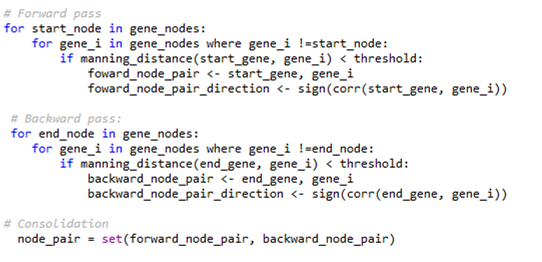

In [26]:
# In order to extract all paths, I propose following pseudo codes
from IPython.display import Image
Image(filename='my_algo.png') 

In [27]:
# Path Extraction
# To start with a simple Dynamic Programming algorithm, we focus
# on finding the lowest total Hamming Distance per simulation.
def DP_lowest_hamming_distance(df, start, end):
    "A Dynamic Programming to obtain a path with lowest total Hamming Distance"
    
    # Extract necessary information from original dataframe
    fixed_nodes = find_fixed_nodes(df)
    if start in fixed_nodes:
        pass
    else:
        fixed_nodes.append(start)
    if end in fixed_nodes:
        pass
    else:
        fixed_nodes.append(end)
    headers = df.columns.values.tolist()
    #print (headers, len(headers))
    #print ()
    #print (fixed_nodes, len(fixed_nodes))
    
    # Prepare the correlation matrix based on Hamming Distance
    df_corr = df.corr(method=calculate_hamming)
    df_corr_reduced = df_corr.drop(index=fixed_nodes).copy()
    #display(HTML(df_corr_reduced.to_html()))
    
    def adjacent_nodes(df, initial_node):
        """ helper function to generate a list of nodes that 
        has smallest Hamming distance with the given node """
        adjacent_nodes = list(df.index[df[initial_node]==min(df[initial_node])])
        return adjacent_nodes
    
    # Forward pass
    def foward_pass(df, start):
        """ Helper function to identify node pairs from start node """
        foward_pass_node_pairs = list()
        start_node_list = [start]
        for node_i in headers:
            if node_i == end:
                pass
            elif node_i in start_node_list:
                start_to_next = adjacent_nodes(df, node_i)
                #print (start_to_next)
                for next_node in start_to_next:
                    foward_pass_node_pairs.append((node_i, next_node))
                    #print(foward_pass_node_pairs)
                start_node_list = start_to_next.copy() 
        return foward_pass_node_pairs
                
    # Backward pass
    def backward_pass(df, end):
        """ Helper function to identify node pairs from end node """
        backward_pass_node_pairs = list()
        end_node_list = [end]
        for node_j in headers:
            if node_j == start:
                pass
            elif node_j in end_node_list:
                predecessor_to_end = adjacent_nodes(df, node_j)
                #print(predecessor_to_end)
                for predecessor_node in predecessor_to_end:
                    backward_pass_node_pairs.append((predecessor_node, node_j))
                    #print(backward_pass_node_pairs)
                end_node_list = predecessor_to_end.copy()
        return backward_pass_node_pairs
    
    # Union of two sets    
    forward = foward_pass(df_corr_reduced,start)
    backward = backward_pass(df_corr_reduced,end)
    #print (forward, len(forward))
    #print (backward, len(backward))
    node_pairs = list(set(forward).union(set(backward)))
    return node_pairs


In [28]:
df = pd.DataFrame(sim_data['sim_001'],columns=header)
connection = DP_lowest_hamming_distance(df,start="ABA",end="CLOSURE")

In [29]:
for pairs in connection:
    print(pairs)
print()
print (len(connection))

('PA', 'DEPOLAR')
('IP6', 'PA')
('DEPOLAR', 'CLOSURE')
('PA', 'CLOSURE')
('Actin', 'AnionEM')
('ABA', 'SPHK')
('IP6', 'Actin')
('AnionEM', 'CLOSURE')
('DEPOLAR', 'SPHK')
('PA', 'SPHK')
('AnionEM', 'DEPOLAR')
('SPHK', 'DEPOLAR')
('SPHK', 'CLOSURE')
('IP6', 'AnionEM')
('ABA', 'PA')
('ABA', 'IP6')
('ABA', 'Actin')
('AnionEM', 'SPHK')
('DEPOLAR', 'PA')
('DEPOLAR', 'IP6')
('PA', 'IP6')
('Actin', 'DEPOLAR')
('Actin', 'CLOSURE')
('DEPOLAR', 'Actin')
('ABA', 'AnionEM')
('PA', 'Actin')
('AnionEM', 'IP6')
('AnionEM', 'PA')
('Actin', 'SPHK')
('SPHK', 'PA')
('IP6', 'DEPOLAR')
('SPHK', 'IP6')
('IP6', 'CLOSURE')
('DEPOLAR', 'AnionEM')
('PA', 'AnionEM')
('AnionEM', 'Actin')
('SPHK', 'Actin')
('IP6', 'SPHK')
('Actin', 'PA')
('Actin', 'IP6')
('SPHK', 'AnionEM')
('ABA', 'DEPOLAR')

42


In [30]:
import time
start_time = time.time()
pairs = list()
for key, values in sim_data.items():
    df = pd.DataFrame(values,columns=header)
    connection = DP_lowest_hamming_distance(df,start="ABA",end="CLOSURE")
    pairs = pairs+connection
print ("Total CPU run time: %.4f" %(time.time()-start_time))

Total CPU run time: 6.6786


In [31]:
unique_pairs = list(set(pairs))

In [32]:
print (len(unique_pairs))

480


In [33]:
print (len(pairs))

18473


In [34]:
pairs_cfq = dict()
for node_pair in pairs:
    if node_pair not in pairs_cfq.keys():
        pairs_cfq[node_pair] = 1
    else:
        pairs_cfq[node_pair] +=1

In [35]:
# To check if the process correctly captures all pairs' frequency
print (sum(pairs_cfq.values()))

18473


In [36]:
import numpy as np
n_rows = len(header)
table = np.zeros((n_rows,n_rows), dtype=float)
df = pd.DataFrame(table,index=header,columns=header)

In [37]:
df.head()

,ABA,CLOSURE,Ca,CaATPase,CAIM,CIS,ABH1,GCR,ERA1,PEPC,...,GPA,ROS,AnionEM,ABI,DEPOLAR,HATPase,KOUT,KAP,Actin,NO
ABA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CLOSURE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CaATPase,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAIM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# This way to update will create a right stochastic matrix reading 
# from row (Start node) to column (End node) to faciliate future 
# calculation of stationary state.
for keys, value in pairs_cfq.items():
    df[keys[1]][keys[0]] = value

In [39]:
display(HTML(df.to_html()))

,ABA,CLOSURE,Ca,CaATPase,CAIM,CIS,ABH1,GCR,ERA1,PEPC,OST,SPHK,PH,PLD,ROP2,KEV,AGB,RAC,RCN,NIA12,PLC,InsPK,IP6,ADPRc,GC,NOS,S1P,PA,IP3,cADPR,cGMP,MALATE,ATRBOH,GPA,ROS,AnionEM,ABI,DEPOLAR,HATPase,KOUT,KAP,Actin,NO
ABA,0.0,0.0,0.0,0.0,0.0,2.0,141.0,136.0,134.0,0.0,132.0,118.0,126.0,101.0,82.0,0.0,0.0,0.0,122.0,117.0,0.0,136.0,121.0,0.0,0.0,0.0,123.0,89.0,0.0,0.0,0.0,0.0,60.0,108.0,69.0,95.0,0.0,139.0,0.0,138.0,0.0,123.0,0.0
CLOSURE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CaATPase,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAIM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CIS,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0
ABH1,0.0,40.0,0.0,0.0,0.0,0.0,0.0,78.0,75.0,0.0,73.0,65.0,67.0,41.0,23.0,0.0,0.0,0.0,65.0,51.0,0.0,75.0,55.0,0.0,0.0,0.0,58.0,26.0,0.0,0.0,0.0,0.0,14.0,32.0,19.0,28.0,0.0,62.0,0.0,55.0,0.0,59.0,0.0
GCR,0.0,38.0,0.0,0.0,0.0,0.0,78.0,0.0,73.0,0.0,67.0,60.0,72.0,39.0,24.0,0.0,0.0,0.0,66.0,52.0,0.0,75.0,45.0,0.0,0.0,0.0,55.0,21.0,0.0,0.0,0.0,0.0,15.0,39.0,20.0,25.0,0.0,69.0,0.0,49.0,0.0,56.0,0.0
ERA1,0.0,45.0,0.0,0.0,0.0,0.0,75.0,73.0,0.0,0.0,73.0,62.0,63.0,34.0,22.0,0.0,0.0,0.0,63.0,49.0,0.0,70.0,48.0,0.0,0.0,0.0,53.0,20.0,0.0,0.0,0.0,0.0,18.0,39.0,19.0,27.0,0.0,64.0,0.0,48.0,0.0,56.0,0.0
PEPC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
row_sum = df.sum(axis=1).values

In [41]:
df_row_sum = pd.DataFrame(row_sum,index=header,columns=['Sum'])

In [42]:
df_row_sum.head()

,Sum
ABA,2412.0
CLOSURE,0.0
Ca,0.0
CaATPase,0.0
CAIM,0.0


In [43]:
df_row_sum.loc['ABA','Sum']

2412.0

In [44]:
df.loc['ABA',:]

ABA           0.0
CLOSURE       0.0
Ca            0.0
CaATPase      0.0
CAIM          0.0
CIS           2.0
ABH1        141.0
GCR         136.0
ERA1        134.0
PEPC          0.0
OST         132.0
SPHK        118.0
PH          126.0
PLD         101.0
ROP2         82.0
KEV           0.0
AGB           0.0
RAC           0.0
RCN         122.0
NIA12       117.0
PLC           0.0
InsPK       136.0
IP6         121.0
ADPRc         0.0
GC            0.0
NOS           0.0
S1P         123.0
PA           89.0
IP3           0.0
cADPR         0.0
cGMP          0.0
MALATE        0.0
ATRBOH       60.0
GPA         108.0
ROS          69.0
AnionEM      95.0
ABI           0.0
DEPOLAR     139.0
HATPase       0.0
KOUT        138.0
KAP           0.0
Actin       123.0
NO            0.0
Name: ABA, dtype: float64

In [45]:
df.loc[:,'CLOSURE']

ABA          0.0
CLOSURE      0.0
Ca           0.0
CaATPase     0.0
CAIM         0.0
CIS          0.0
ABH1        40.0
GCR         38.0
ERA1        45.0
PEPC         0.0
OST         36.0
SPHK        27.0
PH          34.0
PLD         53.0
ROP2        65.0
KEV          0.0
AGB          0.0
RAC          0.0
RCN         35.0
NIA12       44.0
PLC          0.0
InsPK       44.0
IP6         49.0
ADPRc        0.0
GC           0.0
NOS          0.0
S1P         47.0
PA          50.0
IP3          0.0
cADPR        0.0
cGMP         0.0
MALATE       0.0
ATRBOH      96.0
GPA         53.0
ROS         75.0
AnionEM     80.0
ABI          0.0
DEPOLAR     43.0
HATPase      0.0
KOUT        59.0
KAP          0.0
Actin       51.0
NO           0.0
Name: CLOSURE, dtype: float64

In [46]:
df.loc['ABA',:]/df_row_sum.loc['ABA','Sum']

ABA         0.000000
CLOSURE     0.000000
Ca          0.000000
CaATPase    0.000000
CAIM        0.000000
CIS         0.000829
ABH1        0.058458
GCR         0.056385
ERA1        0.055556
PEPC        0.000000
OST         0.054726
SPHK        0.048922
PH          0.052239
PLD         0.041874
ROP2        0.033997
KEV         0.000000
AGB         0.000000
RAC         0.000000
RCN         0.050580
NIA12       0.048507
PLC         0.000000
InsPK       0.056385
IP6         0.050166
ADPRc       0.000000
GC          0.000000
NOS         0.000000
S1P         0.050995
PA          0.036899
IP3         0.000000
cADPR       0.000000
cGMP        0.000000
MALATE      0.000000
ATRBOH      0.024876
GPA         0.044776
ROS         0.028607
AnionEM     0.039386
ABI         0.000000
DEPOLAR     0.057629
HATPase     0.000000
KOUT        0.057214
KAP         0.000000
Actin       0.050995
NO          0.000000
Name: ABA, dtype: float64

In [47]:
sum(df.loc['ABA',:]/df_row_sum.loc['ABA','Sum'])

0.9999999999999999

In [48]:
for key in header:
    if df_row_sum.loc[key,'Sum'] == 0:
        pass
    else:
        df.loc[key,:] = round(df.loc[key,:]/df_row_sum.loc[key,'Sum'],4)

In [49]:
display(HTML(df.to_html()))

,ABA,CLOSURE,Ca,CaATPase,CAIM,CIS,ABH1,GCR,ERA1,PEPC,OST,SPHK,PH,PLD,ROP2,KEV,AGB,RAC,RCN,NIA12,PLC,InsPK,IP6,ADPRc,GC,NOS,S1P,PA,IP3,cADPR,cGMP,MALATE,ATRBOH,GPA,ROS,AnionEM,ABI,DEPOLAR,HATPase,KOUT,KAP,Actin,NO
ABA,0.0,0.0000,0.0,0.0,0.0,0.0008,0.0585,0.0564,0.0556,0.0,0.0547,0.0489,0.0522,0.0419,0.0340,0.0,0.0,0.0,0.0506,0.0485,0.0,0.0564,0.0502,0.0,0.0,0.0,0.0510,0.0369,0.0,0.0,0.00,0.0,0.0249,0.0448,0.0286,0.0394,0.0,0.0576,0.0,0.0572,0.0,0.0510,0.00
CLOSURE,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.00,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.00
Ca,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.00,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.00
CaATPase,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.00,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.00
CAIM,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.00,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.00
CIS,0.0,0.0000,0.0,0.0,0.0,0.0000,0.1000,0.0500,0.0000,0.0,0.0500,0.0000,0.0500,0.0000,0.0500,0.0,0.0,0.0,0.0500,0.1000,0.0,0.0500,0.0000,0.0,0.0,0.0,0.0500,0.0000,0.0,0.0,0.05,0.0,0.0500,0.0500,0.0500,0.0000,0.0,0.0500,0.0,0.0500,0.0,0.1000,0.05
ABH1,0.0,0.0377,0.0,0.0,0.0,0.0000,0.0000,0.0735,0.0707,0.0,0.0688,0.0613,0.0631,0.0386,0.0217,0.0,0.0,0.0,0.0613,0.0481,0.0,0.0707,0.0518,0.0,0.0,0.0,0.0547,0.0245,0.0,0.0,0.00,0.0,0.0132,0.0302,0.0179,0.0264,0.0,0.0584,0.0,0.0518,0.0,0.0556,0.00
GCR,0.0,0.0366,0.0,0.0,0.0,0.0000,0.0751,0.0000,0.0703,0.0,0.0645,0.0578,0.0694,0.0376,0.0231,0.0,0.0,0.0,0.0636,0.0501,0.0,0.0723,0.0434,0.0,0.0,0.0,0.0530,0.0202,0.0,0.0,0.00,0.0,0.0145,0.0376,0.0193,0.0241,0.0,0.0665,0.0,0.0472,0.0,0.0539,0.00
ERA1,0.0,0.0441,0.0,0.0,0.0,0.0000,0.0735,0.0715,0.0000,0.0,0.0715,0.0607,0.0617,0.0333,0.0215,0.0,0.0,0.0,0.0617,0.0480,0.0,0.0686,0.0470,0.0,0.0,0.0,0.0519,0.0196,0.0,0.0,0.00,0.0,0.0176,0.0382,0.0186,0.0264,0.0,0.0627,0.0,0.0470,0.0,0.0548,0.00
PEPC,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.00,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.00


In [98]:
edges = list()
for key, value in pairs_cfq.items():
    if value > 50 and value < 100:
        node = (key[0], key[1], value/df_row_sum.loc[key[0],'Sum'])
        edges.append(node)

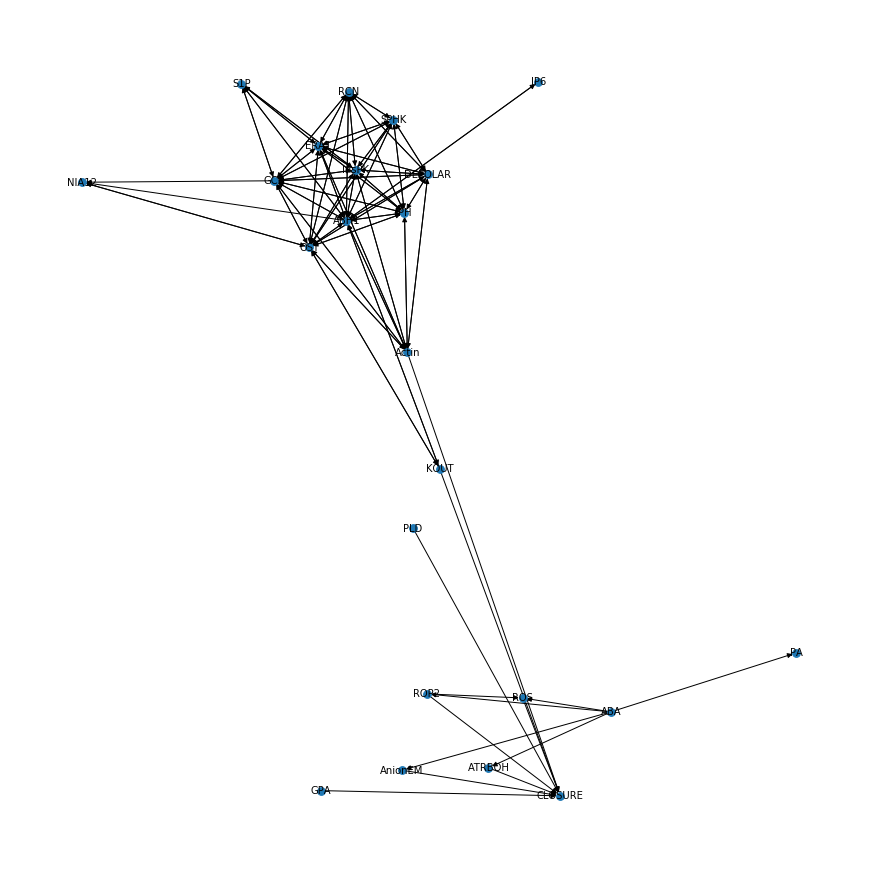

In [99]:
# Construct a graph based on the node pairs extracted and their relative importance
import networkx as nx
import matplotlib.pyplot as plt
G = nx.cycle_graph(80)
#pos = nx.circular_layout(G)
plt.figure(figsize=(12,12)) 
DG = nx.DiGraph()
DG.add_weighted_edges_from(edges)
nx.draw(DG, node_size=60, font_size=10, with_labels=True)
plt.show()

In [101]:
# LIST OF NODES WHICH IS 1-DEGREE AWAY FROM CLOSURE
DG.out_degree("Actin", weight='weight')

0.5017182130584192

In [105]:
DG.out_degree("ATRBOH", weight='weight')

0.276657060518732

In [108]:
DG.out_degree("ROP2", weight='weight')

0.2263056092843327

In [102]:
DG.out_degree("KOUT", weight='weight')

0.20072992700729927

In [106]:
DG.out_degree("ROS", weight='weight')

0.1609442060085837

In [103]:
DG.out_degree("AnionEM", weight='weight')

0.15296367112810708

In [109]:
DG.out_degree("PLD", weight='weight')

0.09671532846715329

In [107]:
DG.out_degree("GPA", weight='weight')

0.0853462157809984

In [110]:
# If we want to control the closure, "Actin" should be the chemical that we first focus on.